In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("daily-min-temperatures.csv",parse_dates=['Date'],index_col='Date')

In [4]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


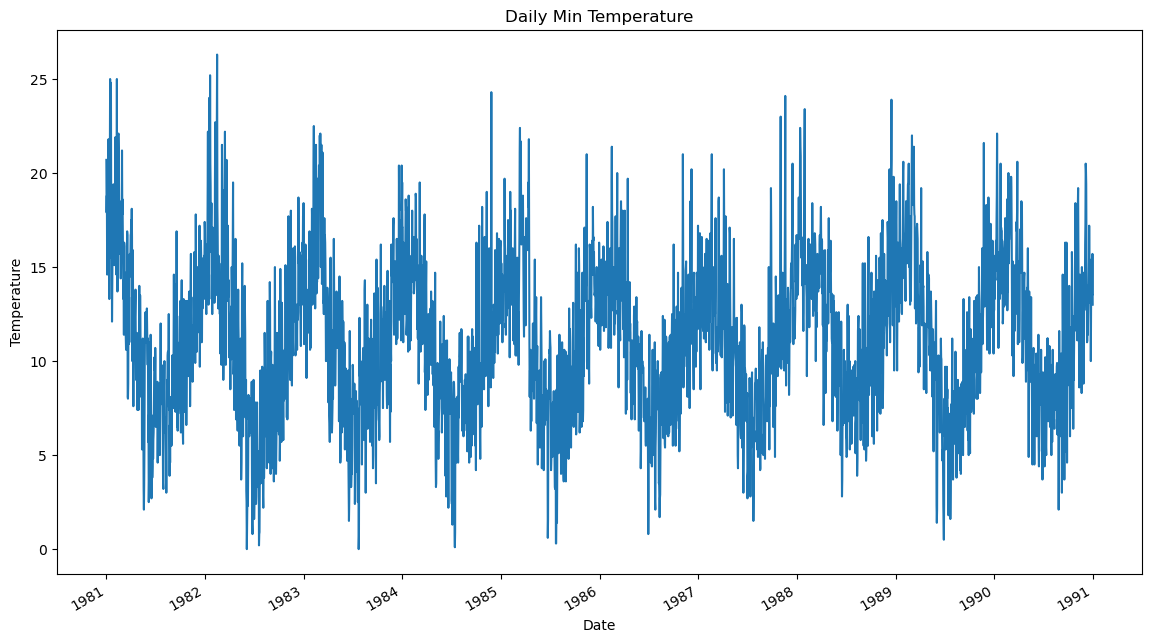

In [5]:
df.plot(title = 'Daily Min Temperature',figsize=(14,8),legend=None)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [8]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series):
    statistic,p_value,n_lags,critical_values = kpss(series)
    print(f'KPSS Statistic:{statistic:.4f}')
    print(f'p-value:{p_value:.4f}')
    print(f'Number of lags:{n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'{key}:{value:.4f}')
    print(f'Result: The series is{" not " if p_value<0.05 else" "}stationary')
kpss_test(df['Temp'])

KPSS Statistic:0.0557
p-value:0.1000
Number of lags:36
Critical Values:
10%:0.3470
5%:0.4630
2.5%:0.5740
1%:0.7390
Result: The series is stationary


C:\Users\admin\AppData\Local\Temp\ipykernel_1452\598363367.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic,p_value,n_lags,critical_values = kpss(series)


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Temp'],model = 'additive',period=360)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

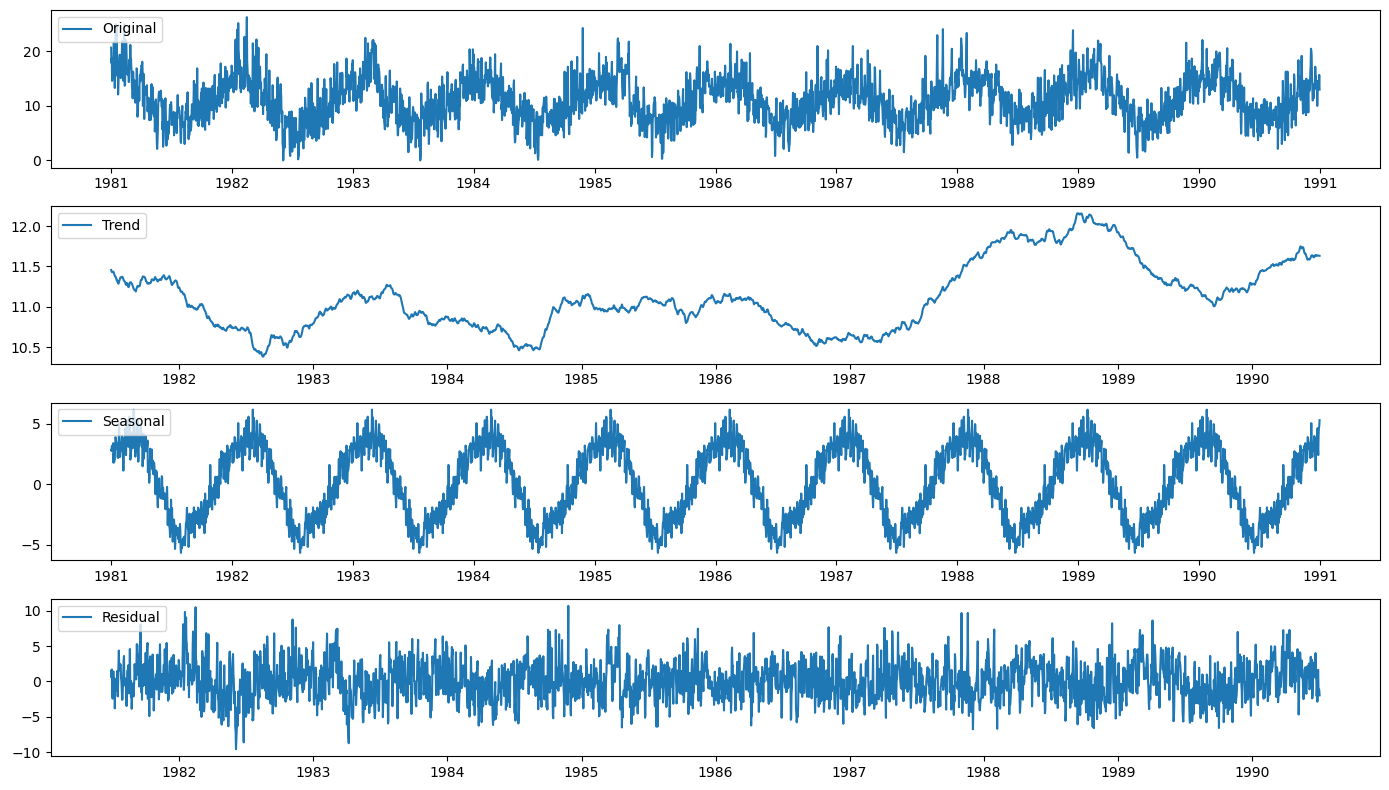

In [11]:
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(df['Temp'],label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()